# DELHIVERY-FEATURE ENGINEERING

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

DatasetLink:
    
https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?
1642751181

Column Profiling:

    data - tells whether the data is testing or training data
    trip_creation_time – Timestamp of trip creation
    route_schedule_uuid – Unique Id for a particular route schedule
    route_type – Transportation type
    FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    Carting: Handling system consisting of small vehicles (carts)
    trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
    source_center - Source ID of trip origin
    source_name - Source Name of trip origin
    destination_cente – Destination ID
    destination_name – Destination Name
    od_start_time – Trip start time
    od_end_time – Trip end time
    start_scan_to_end_scan – Time taken to deliver from source to destination
    is_cutoff – Unknown field
    cutoff_factor – Unknown field
    cutoff_timestamp – Unknown field
    actual_distance_to_destination – Distance in Kms between source and destination warehouse
    actual_time – Actual time taken to complete the delivery (Cumulative)
    osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
    osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
    factor – Unknown field
    segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
    segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
    segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
    segment_factor – Unknown field

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind, shapiro, kruskal, chi2_contingency, levene
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Loading Delhivery data

In [2]:
delhivery_data = pd.read_csv('delhivery_data.csv')

In [3]:
delhivery_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
delhivery_data.shape

(144867, 24)

There are 24 fields with 144867 rows. Out of 24 fields 5 are unknown fileds which can be dropped.

is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

factor – Unknown field

segment_factor - Unknown field

# 1. BASIC DATA CLEANING AND EXPLORTION

# Dropping unknown fields

In [5]:
delhivery_data = delhivery_data.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'], axis = 1)

In [6]:
delhivery_data.shape

(144867, 19)

In [7]:
list(delhivery_data.columns)

['data',
 'trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [9]:
delhivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

There are three date_time fields of object type which are needed to be converted into date_time.

trip_creation_time

od_start_time

od_end_time

# Converting date fields to type dateTime

In [10]:
delhivery_data['trip_creation_time']=pd.to_datetime(delhivery_data['trip_creation_time'])
delhivery_data['od_start_time']=pd.to_datetime(delhivery_data['od_start_time'])
delhivery_data['od_end_time']=pd.to_datetime(delhivery_data['od_end_time'])

In [11]:
delhivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [12]:
delhivery_data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

For handling null values in source_name and destination_name, getting list of source_center and destination_center 
for the corresponding null values.

In [13]:
ids_source_name_null = list(delhivery_data.loc[delhivery_data.source_name.isnull(),'source_center'].unique())
ids_source_name_null

['IND342902A1B',
 'IND577116AAA',
 'IND282002AAD',
 'IND465333A1B',
 'IND841301AAC',
 'IND509103AAC',
 'IND126116AAA',
 'IND331022A1B',
 'IND505326AAB',
 'IND852118A1B']

In [14]:
len(ids_source_name_null)

10

In [15]:
ids_destination_name_null = list(delhivery_data[delhivery_data.destination_name.isnull()].destination_center.unique())
ids_destination_name_null

['IND342902A1B',
 'IND577116AAA',
 'IND282002AAD',
 'IND465333A1B',
 'IND841301AAC',
 'IND505326AAB',
 'IND852118A1B',
 'IND126116AAA',
 'IND509103AAC',
 'IND221005A1A',
 'IND250002AAC',
 'IND331001A1C',
 'IND122015AAC']

In [16]:
len(ids_destination_name_null)

13

In [17]:
np.all(ids_source_name_null in ids_destination_name_null)

False

Missing field ids are not same for both souce and destination. so merging them and creating single unique list.

In [18]:
missing_name_id = list(set(ids_destination_name_null+ids_source_name_null))

There are some missing area names both in source_name and destination_name in common.
We are going to handle this by giving some dummy location name in the same format as 'Anand_VUNagar_DC (Gujarat)'.	

In [19]:
dummy_values= {}
for i,id in enumerate(missing_name_id):
    dummy_values[id] = f'city{i}_place{i}_code{i}(Unkonwn{i})'

In [20]:
dummy_values

{'IND221005A1A': 'city0_place0_code0(Unkonwn0)',
 'IND282002AAD': 'city1_place1_code1(Unkonwn1)',
 'IND250002AAC': 'city2_place2_code2(Unkonwn2)',
 'IND122015AAC': 'city3_place3_code3(Unkonwn3)',
 'IND465333A1B': 'city4_place4_code4(Unkonwn4)',
 'IND331001A1C': 'city5_place5_code5(Unkonwn5)',
 'IND577116AAA': 'city6_place6_code6(Unkonwn6)',
 'IND505326AAB': 'city7_place7_code7(Unkonwn7)',
 'IND852118A1B': 'city8_place8_code8(Unkonwn8)',
 'IND509103AAC': 'city9_place9_code9(Unkonwn9)',
 'IND126116AAA': 'city10_place10_code10(Unkonwn10)',
 'IND342902A1B': 'city11_place11_code11(Unkonwn11)',
 'IND841301AAC': 'city12_place12_code12(Unkonwn12)',
 'IND331022A1B': 'city13_place13_code13(Unkonwn13)'}

# Handling missing values in the data.

Filling null values in source_center and destination_center with dummy values corresponding to their source_center and destination_center

In [21]:
for id in ids_source_name_null:
    if id in dummy_values:
        delhivery_data.loc[delhivery_data.source_center == id, 'source_name']= dummy_values[id]

In [22]:
for id in ids_source_name_null:
    if id in dummy_values:
        print(delhivery_data.loc[delhivery_data.source_center == id, ['source_center','source_name']].value_counts())

source_center  source_name                     
IND342902A1B   city11_place11_code11(Unkonwn11)    90
dtype: int64
source_center  source_name                 
IND577116AAA   city6_place6_code6(Unkonwn6)    16
dtype: int64
source_center  source_name                 
IND282002AAD   city1_place1_code1(Unkonwn1)    128
dtype: int64
source_center  source_name                 
IND465333A1B   city4_place4_code4(Unkonwn4)    6
dtype: int64
source_center  source_name                     
IND841301AAC   city12_place12_code12(Unkonwn12)    5
dtype: int64
source_center  source_name                 
IND509103AAC   city9_place9_code9(Unkonwn9)    17
dtype: int64
source_center  source_name                     
IND126116AAA   city10_place10_code10(Unkonwn10)    20
dtype: int64
source_center  source_name                     
IND331022A1B   city13_place13_code13(Unkonwn13)    3
dtype: int64
source_center  source_name                 
IND505326AAB   city7_place7_code7(Unkonwn7)    5
dtype: int64
source_c

In [23]:
for id in ids_destination_name_null:
    if id in dummy_values:
        delhivery_data.loc[delhivery_data.destination_center == id, 'destination_name']= dummy_values[id]

In [24]:
for id in ids_destination_name_null:
    if id in dummy_values:
        print(delhivery_data.loc[delhivery_data.destination_center == id, ['destination_center','destination_name']].value_counts())

destination_center  destination_name                
IND342902A1B        city11_place11_code11(Unkonwn11)    16
dtype: int64
destination_center  destination_name            
IND577116AAA        city6_place6_code6(Unkonwn6)    16
dtype: int64
destination_center  destination_name            
IND282002AAD        city1_place1_code1(Unkonwn1)    151
dtype: int64
destination_center  destination_name            
IND465333A1B        city4_place4_code4(Unkonwn4)    3
dtype: int64
destination_center  destination_name                
IND841301AAC        city12_place12_code12(Unkonwn12)    9
dtype: int64
destination_center  destination_name            
IND505326AAB        city7_place7_code7(Unkonwn7)    11
dtype: int64
destination_center  destination_name            
IND852118A1B        city8_place8_code8(Unkonwn8)    15
dtype: int64
destination_center  destination_name                
IND126116AAA        city10_place10_code10(Unkonwn10)    10
dtype: int64
destination_center  destination_name     

In [25]:
delhivery_data.isnull().sum().sum()

0

There are no null values we can proceed with analysis.

In [26]:
#Creating a copy of dataframe

In [27]:
delhivery = delhivery_data.copy()

In [123]:
delhivery.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0


# Exploring each column to segregate categorical and numerical columns

In [29]:
delhivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [30]:
print("-- 'data' field has",delhivery.data.unique(),"as unique values")
print("-- The 'trip_creation_time' for the data given is between",delhivery.trip_creation_time.min().date(),"and",
      delhivery.trip_creation_time.max().date(),"dates")

print("-- 'route_schedule_uuid' field has",len(list(delhivery.route_schedule_uuid.unique())),"unique values")

print("-- 'route_type' field has",list(delhivery.route_type.unique()),"as unique values")

print("-- 'trip_uuid' field has",len(list(delhivery.trip_uuid.unique())),"unique values")

print("-- 'source_center' field has",len(list(delhivery.source_center.unique())),"unique values")

print("-- 'source_name' field has",len(list(delhivery.source_name.unique())),"unique values")

print("-- 'destination_center' field has",len(list(delhivery.destination_center.unique())),"unique values")

print("-- 'destination_name' field has",len(list(delhivery.destination_name.unique())),"unique values")

print("-- The 'od_start_time' for the data given is between",delhivery.od_start_time.min().date(),"and",
      delhivery.od_start_time.max().date(),"dates")

print("-- The 'od_end_time' for the data given is between",delhivery.od_end_time.min().date(),"and",
      delhivery.od_end_time.max().date(),"dates")

-- 'data' field has ['training' 'test'] as unique values
-- The 'trip_creation_time' for the data given is between 2018-09-12 and 2018-10-03 dates
-- 'route_schedule_uuid' field has 1504 unique values
-- 'route_type' field has ['Carting', 'FTL'] as unique values
-- 'trip_uuid' field has 14817 unique values
-- 'source_center' field has 1508 unique values
-- 'source_name' field has 1508 unique values
-- 'destination_center' field has 1481 unique values
-- 'destination_name' field has 1481 unique values
-- The 'od_start_time' for the data given is between 2018-09-12 and 2018-10-06 dates
-- The 'od_end_time' for the data given is between 2018-09-12 and 2018-10-08 dates


From the above obeservation 'data' and 'route_type' can be main categorical coulumns and all with nemerical values can be numerical fields.

In [31]:
cat_cols = ['data', 'route_type']
delhivery[cat_cols]= delhivery[cat_cols].astype('category')

In [32]:
num_cols = list(delhivery.dtypes.reset_index()[delhivery.dtypes.reset_index()[0]=='float64']['index'])
num_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [33]:
delhivery.dtypes

data                                    category
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time                      float64
segment_osrm_time                        float64
segment_osrm_distance                    float64
dtype: object

In [34]:
delhivery.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [35]:
delhivery.describe(include=['object','category'])

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867,144867,144867
unique,2,1504,2,14817,1508,1508,1481,1481
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153776597384821516,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23347,15192,15192


From the above table we can observe that:

    - The mode of 'data' field is 'training'
    - With frequent 'route_type' as 'FTL'
    - With top source and destinations as 'Gurgaon_Bilaspur_HB (Haryana)'

# 2. MERGING ROWS AND AGGREGATING COLUMNS

# Grouping by segment

In [36]:
delhivery.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [37]:
# grouping by trip_uuid, source_center, destination_center

In [38]:
#creating segment_key for each segment 
delhivery['segment_key'] = delhivery['trip_uuid'] + delhivery['source_center'] + delhivery['destination_center']

In [39]:
#segment_actual_time_sum,segment_osrm_distance_sum, segment_osrm_time_sum.
delhivery['segment_actual_time_sum'] = delhivery.groupby('segment_key').agg(segment_actual_time_sum = ('segment_actual_time',np.cumsum))
delhivery['segment_osrm_distance_sum'] = delhivery.groupby('segment_key').agg(segment_osrm_distance_sum = ('segment_osrm_distance',np.cumsum))
delhivery['segment_osrm_time_sum'] = delhivery.groupby('segment_key').agg(segment_osrm_time_sum = ('segment_osrm_time',np.cumsum))

In [40]:
delhivery.loc[delhivery.segment_key == 'trip-153741093647649320IND388121AAAIND388620AAB',['actual_distance_to_destination','actual_time']]

,actual_distance_to_destination,actual_time
0,10.435660,14.0
1,18.936842,24.0
2,27.637279,40.0
3,36.118028,62.0
4,39.386040,68.0


# Aggregating at segment level

In [41]:
create_segment_dict ={
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
}

In [42]:
#creating a segment_level dataframe named segment  grouped by segment_key and the aggregated values 
#as in create_segment_dic

segment = delhivery.groupby('segment_key').agg(create_segment_dict).reset_index()

In [43]:
#sorting segment by 'segment_key' and 'od_end_time' ensuring thatsegments within the same trip are ordered by their
#end timesfrom earliest to latest.

segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [44]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26368 non-null  int64         
 1   segment_key                     26368 non-null  object        
 2   data                            26368 non-null  object        
 3   trip_creation_time              26368 non-null  datetime64[ns]
 4   route_schedule_uuid             26368 non-null  object        
 5   route_type                      26368 non-null  object        
 6   trip_uuid                       26368 non-null  object        
 7   source_center                   26368 non-null  object        
 8   source_name                     26368 non-null  object        
 9   destination_center              26368 non-null  object        
 10  destination_name                26368 non-null  object        
 11  od

# Grouping and Aggregating at trip level

In [45]:
create_trip_dict ={
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
}

In [46]:
#creating a trip_level dataframe named trip grouped by trip_uuid and the aggregated values 
#as in create_trip_dic

trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)

In [47]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  object        
 4   trip_uuid                       14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   od_start_time                   14817 non-null  datetime64[ns]
 10  od_end_time                     14817 non-null  datetime64[ns]
 11  st

In [48]:
#we can check for actual_time, osrm_time,osrm_distance of trip and cumulatives of segment using this trip dataframe
# and check how far is the reality in sync with the osrm navigation system

In [49]:
trip[['actual_time','segment_actual_time_sum']].head()

,actual_time,segment_actual_time_sum
0,830.0,820.0
1,96.0,95.0
2,2736.0,2700.0
3,59.0,59.0
4,63.0,63.0


In [50]:
trip[['osrm_time','segment_osrm_time_sum']].head()

,osrm_time,segment_osrm_time_sum
0,388.0,474.0
1,42.0,39.0
2,1528.0,1710.0
3,15.0,16.0
4,27.0,26.0


In [51]:
trip[['osrm_distance','segment_osrm_distance_sum']].head()

,osrm_distance,segment_osrm_distance_sum
0,544.8027,649.8528
1,56.9116,55.9899
2,2072.8556,2227.5270
3,19.6800,19.8766
4,29.5696,29.5697


# 3. FEATURE ENGINEERING

In [52]:
# Creating new field od_time_diff_hour(time in mins) -time taken between od_start_time and od_end_time

In [53]:
trip['od_total_time'] = (trip['od_end_time']-trip['od_start_time']).dt.total_seconds()/60

In [54]:
#dropping fields od_start_time and od_end_time

In [55]:
trip = trip.drop(['od_start_time','od_end_time'], axis = 1)

# Split and extract features out of source_name and destination_name

In [56]:
def location_to_state(loc):
   return loc.split('(')[1][:-1]

In [57]:
def location_to_city(loc):
    l = loc.split('(')[0].split('_')[0]
    if 'CCU' in loc:
        return 'Kolkata'
    elif 'MAA' in loc.upper():
        return 'Chennai'
    elif ('HBR' in loc.upper()) or ('BLR' in loc.upper()):
        return 'Bengaluru'
    elif 'FBD' in loc.upper():
        return 'Faridabad'
    elif 'BOM' in loc.upper():
        return 'Mumbai'
    elif 'DEL' in loc.upper():
        return 'Delhi'
    elif 'OK' in loc.upper():
        return 'Delhi'
    elif 'GZB' in loc.upper():
        return 'Ghaziabad'
    elif 'GGN' in loc.upper():
        return 'Gurgaon'
    elif 'AMD' in loc.upper():
        return 'Ahmedabad'
    elif 'CJB' in loc.upper():
        return 'Coimbatore'
    elif 'HYD' in loc.upper():
        return 'Hyderabad'
    return l

In [58]:
def location_to_place(loc):
    if 'HBR' in loc:
        return 'HBR Layout PC'
    else:
             # we will remove state
        loc = loc.split('(')[0]

        len_ = len(loc.split('_'))

        if len_ >= 3:
            return loc.split('_')[1]

        # small cities have same city and place name
        if len_ == 2:
            return loc.split('_')[0]

        return loc.split(' ')[0]

In [59]:
def location_to_code(loc):
    # we will remove state
    loc = loc.split('(')[0]

    if len(loc.split('_')) >= 3:
        return loc.split('_')[-1]

    return 'none'

In [60]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: location_to_state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: location_to_city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: location_to_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: location_to_code(x))

In [61]:
trip[['destination_state','destination_city','destination_place','destination_code']].head()

,destination_state,destination_city,destination_place,destination_code
0,Uttar Pradesh,Kanpur,Central,6
1,Karnataka,Doddablpur,ChikaDPP,D
2,Haryana,Gurgaon,Bilaspur,HB
3,Maharashtra,Mumbai,MiraRd,IP
4,Karnataka,Sandur,WrdN1DPP,D


In [62]:
trip['source_state'] = trip['source_name'].apply(lambda x: location_to_state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: location_to_city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: location_to_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: location_to_code(x))

In [63]:
trip[['source_state','source_city','source_place','source_code']].head()

,source_state,source_city,source_place,source_code
0,Uttar Pradesh,Kanpur,Central,6
1,Karnataka,Doddablpur,ChikaDPP,D
2,Haryana,Gurgaon,Bilaspur,HB
3,Maharashtra,Mumbai Hub,Mumbai,none
4,Karnataka,Bellary,Bellary,none


# Splitting trip_creation_time according to year, month, day and hour

In [64]:
trip['trip_creation_year'] = trip['trip_creation_time'].dt.year
trip['trip_creation_month']= trip['trip_creation_time'].dt.month
trip['trip_creation_day'] = trip['trip_creation_time'].dt.day
trip['trip_creation_hour'] = trip['trip_creation_time'].dt.hour


In [65]:
trip[['trip_creation_time','trip_creation_year','trip_creation_month','trip_creation_day','trip_creation_hour']].head()

,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour
0,2018-09-12 00:00:16.535741,2018,9,12,0
1,2018-09-12 00:00:22.886430,2018,9,12,0
2,2018-09-12 00:00:33.691250,2018,9,12,0
3,2018-09-12 00:01:00.113710,2018,9,12,0
4,2018-09-12 00:02:09.740725,2018,9,12,0


# 4. IN-DEPTH ANALYSIS

# Calculate the time taken between od_start_time and od_end_time and keep it as a feature.

In [66]:
trip['od_total_time']

0        1260.604421
1          58.832388
2         834.638929
3         100.494935
4         152.012914
            ...     
14812     152.787843
14813      60.590521
14814     248.409092
14815     105.656951
14816     287.474007
Name: od_total_time, Length: 14817, dtype: float64

In [67]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  object        
 4   trip_uuid                       14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

In [68]:
trip_num_cols = list(trip.dtypes.reset_index()[(trip.dtypes.reset_index()[0]=='float64')]['index'])
trip_num_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_distance_sum',
 'segment_osrm_time_sum',
 'od_total_time']

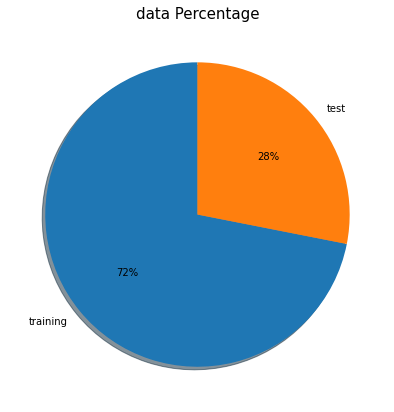

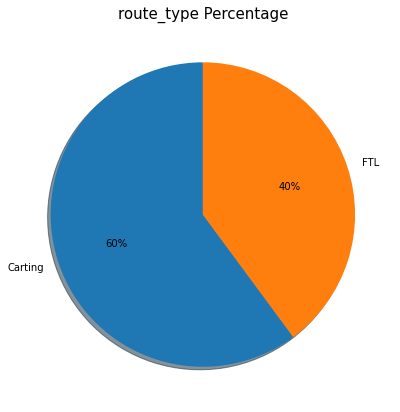

In [69]:
for col in cat_cols:
    fig = plt.figure(figsize=(10,7))
    plt.pie(trip[col].value_counts().values, labels = list(trip[col].value_counts().index), autopct='%.0f%%', shadow= True, 
                startangle = 90)
    plt.title(f"{col} Percentage", fontsize=15)
    plt.show()

Insight:

    Training data is more than testing data.
    60% of trasportation type is carting and 40% is Full Truck Load (FTL).

# Outlier detection and treatment

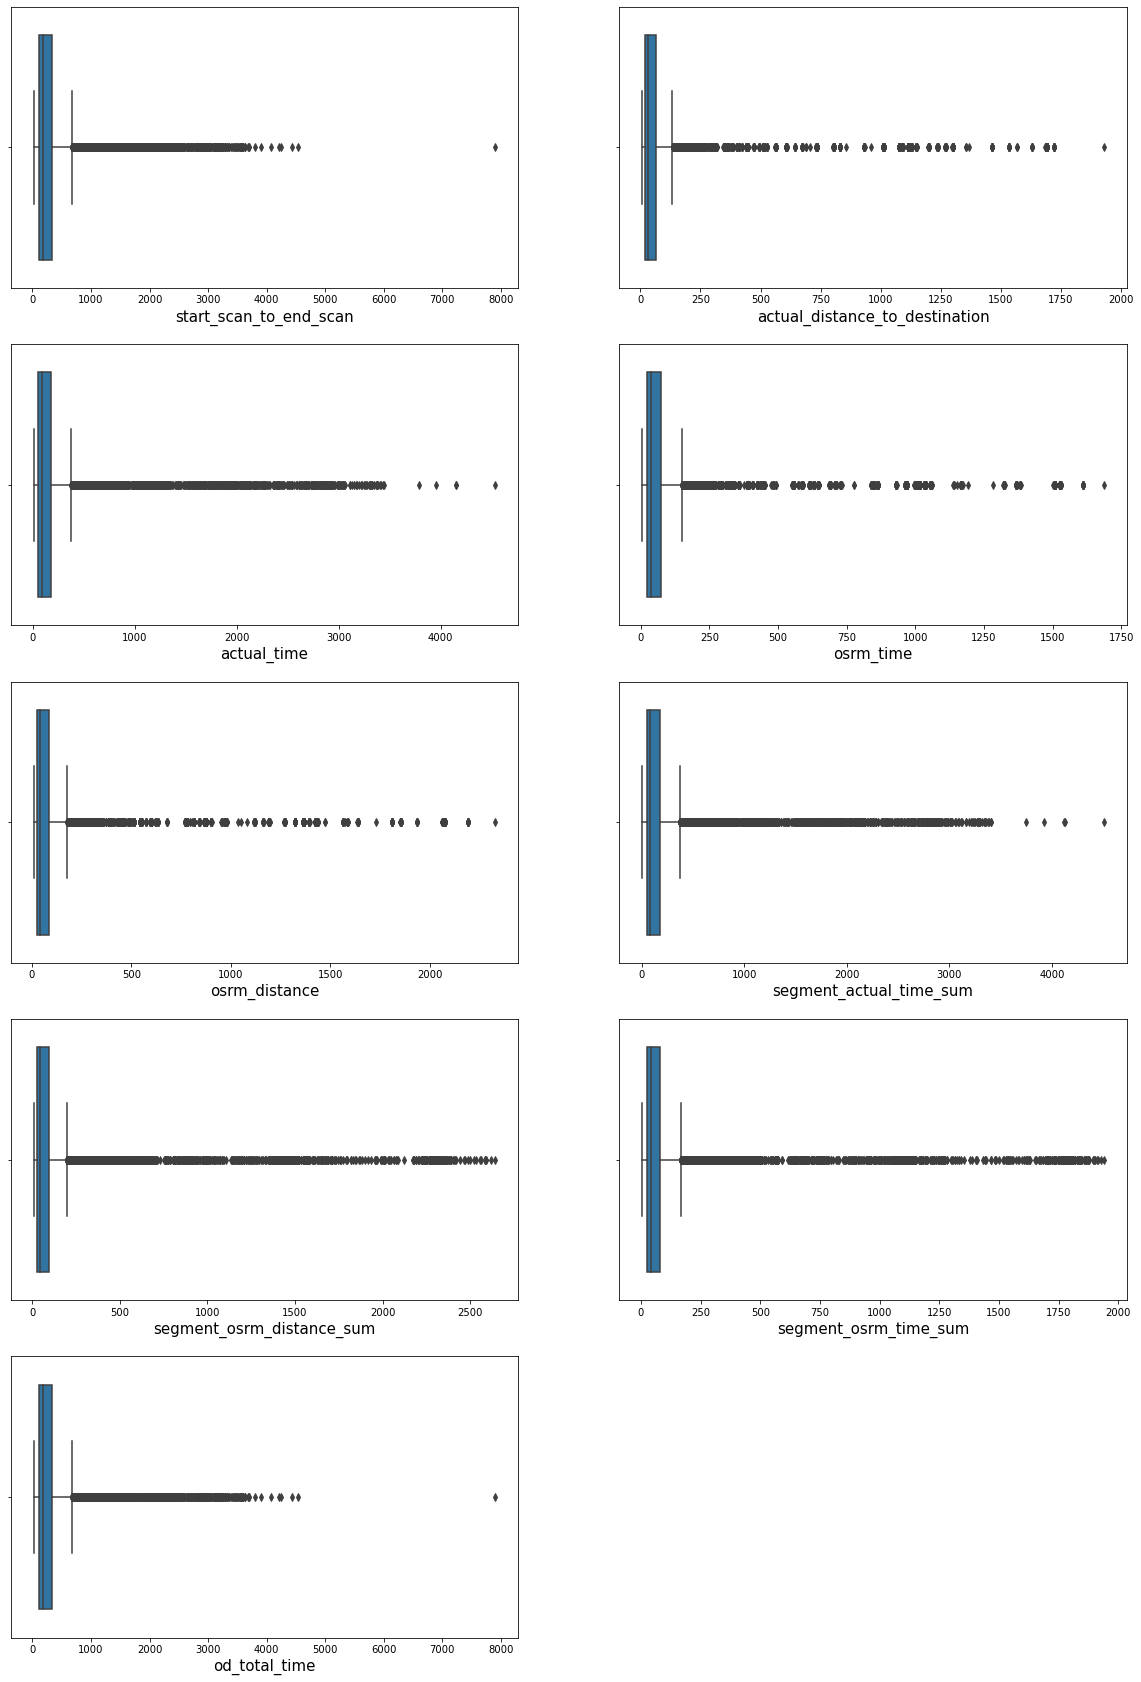

In [70]:
plt.figure(figsize=(20,30))
for i,col in enumerate(trip_num_cols):
    plt.subplot(int(len(trip_num_cols)/2)+1, 2, i+1)
    sns.boxplot(x= trip[col])
    plt.xlabel(col, fontsize=15)
plt.show()

There are many outliers in all the neumerical columns which should be treated.

In [71]:
# detecting outliers
for col in trip_num_cols:
    Q1 = trip[col].quantile(0.25)
    Q3 = trip[col].quantile(0.75)
    IQR = Q3-Q1
    LB = Q1-1.5*IQR
    UB = Q3+1.5*IQR
    outliers = trip[(trip[col]<LB) | (trip[col]>UB)]
    print("Column:",col)
    print("Q1:",Q1)
    print("Q3:",Q3)
    print("LB:",LB)
    print("UB:",UB)
    print("IQR:",IQR)
    print("Outliers:", outliers.shape[0])
    print("-"*25)

Column: start_scan_to_end_scan
Q1: 104.0
Q3: 334.0
LB: -241.0
UB: 679.0
IQR: 230.0
Outliers: 1588
-------------------------
Column: actual_distance_to_destination
Q1: 20.098971767647946
Q3: 65.81230959743395
LB: -48.47103497703106
UB: 134.38231634211297
IQR: 45.713337829786006
Outliers: 2132
-------------------------
Column: actual_time
Q1: 51.0
Q3: 182.0
LB: -145.5
UB: 378.5
IQR: 131.0
Outliers: 1868
-------------------------
Column: osrm_time
Q1: 23.0
Q3: 74.0
LB: -53.5
UB: 150.5
IQR: 51.0
Outliers: 1853
-------------------------
Column: osrm_distance
Q1: 26.0408
Q3: 86.1399
LB: -64.10784999999998
UB: 176.28855
IQR: 60.09909999999999
Outliers: 1940
-------------------------
Column: segment_actual_time_sum
Q1: 50.0
Q3: 180.0
LB: -145.0
UB: 375.0
IQR: 130.0
Outliers: 1873
-------------------------
Column: segment_osrm_distance_sum
Q1: 27.116
Q3: 94.8538
LB: -74.49070000000002
UB: 196.46050000000002
IQR: 67.73780000000001
Outliers: 1941
-------------------------
Column: segment_osrm_tim

Insight: 

    There are many outliers which might be of many reasons. Sometimes they might be true ones , 
    removing them would effect the data. So outliers are left untreated.

# Performing one-hot encoding on categorical features

In [72]:
cat_cols

['data', 'route_type']

In [73]:
print("value counts before label encoding")
print("data")
print(trip['data'].value_counts())
print("route_type")
print(trip['route_type'].value_counts())

value counts before label encoding
data
training    10654
test         4163
Name: data, dtype: int64
route_type
Carting    8908
FTL        5909
Name: route_type, dtype: int64


In [74]:
label_encoder = LabelEncoder()
trip['data'] = label_encoder.fit_transform(trip['data'])
trip['route_type'] = label_encoder.fit_transform(trip['route_type'])

In [75]:
print("value counts after label encoding")
print("data")
print(trip['data'].value_counts())
print("route_type")
print(trip['route_type'].value_counts())

value counts after label encoding
data
1    10654
0     4163
Name: data, dtype: int64
route_type
0    8908
1    5909
Name: route_type, dtype: int64


# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

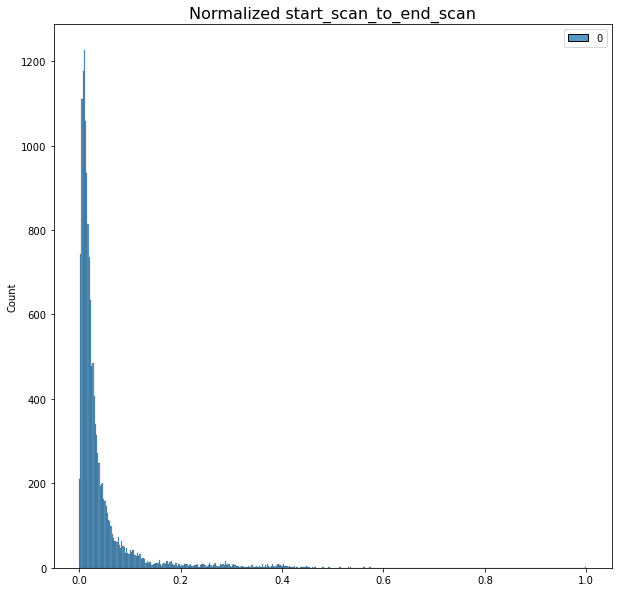

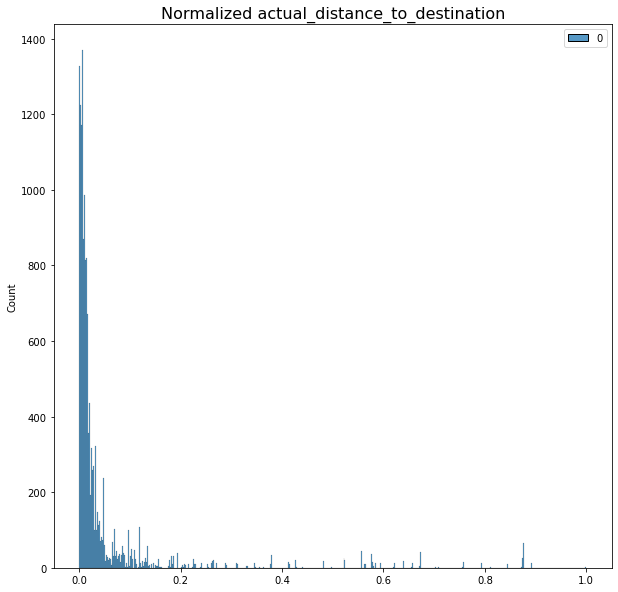

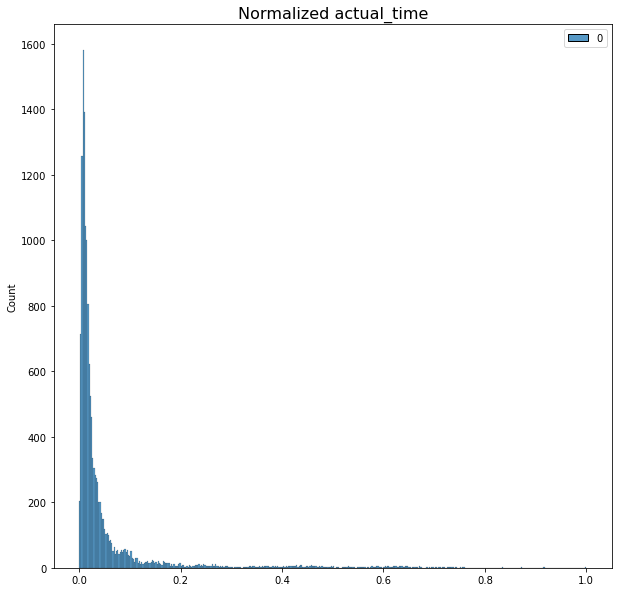

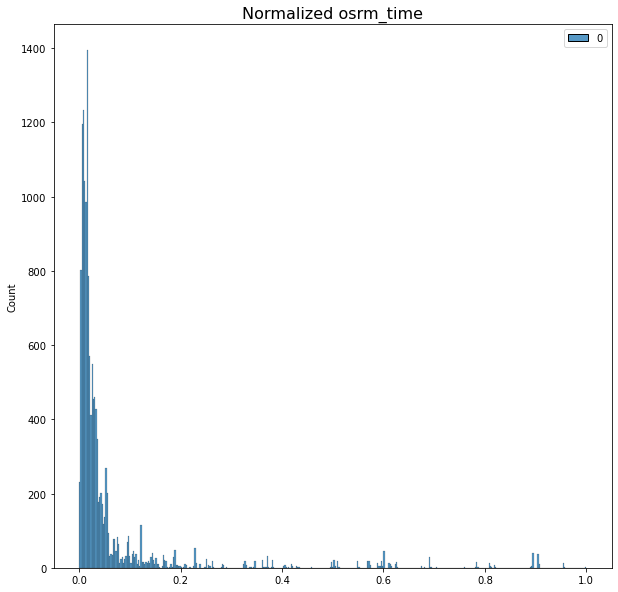

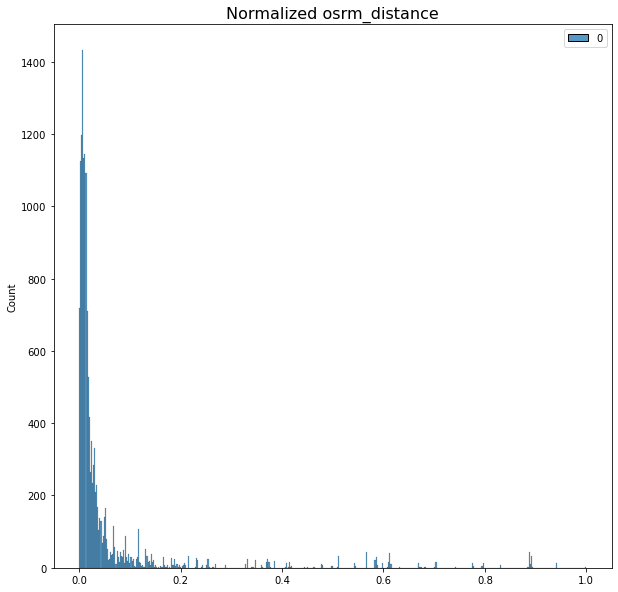

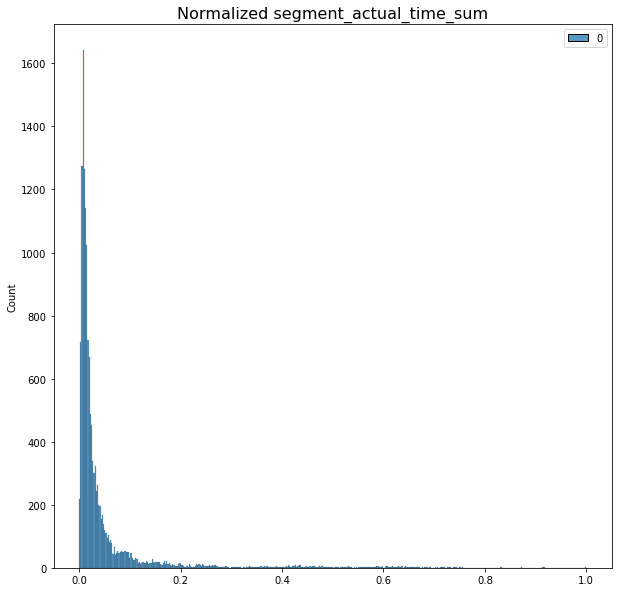

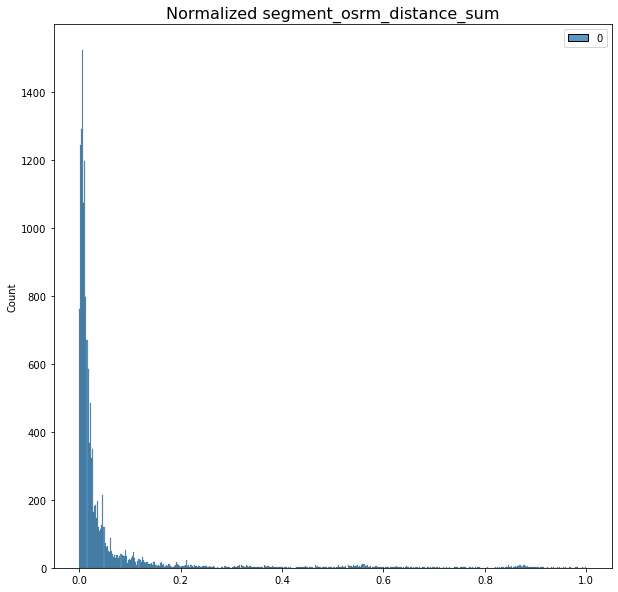

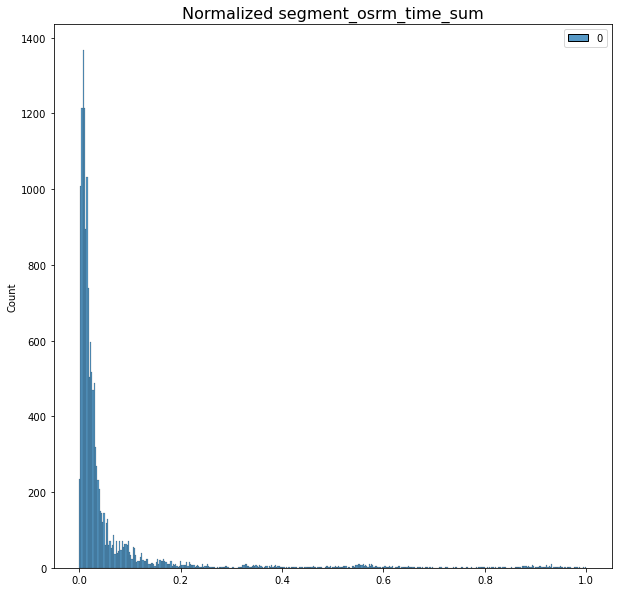

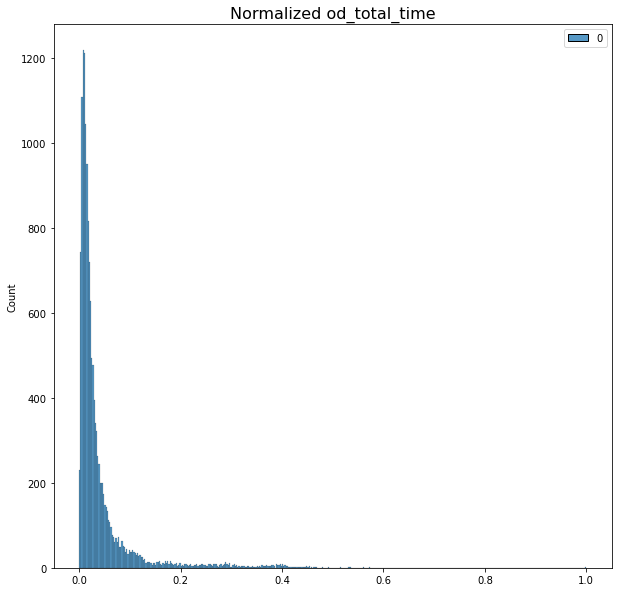

In [76]:
# Normalization 

for col in trip_num_cols:
    plt.figure(figsize = (10, 10))
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(trip[col].to_numpy().reshape(-1, 1))
    sns.histplot(scaled)
    plt.title(f"Normalized {col}", fontsize=16)
    #plt.plot()
    plt.show()

In [77]:
# Standardization

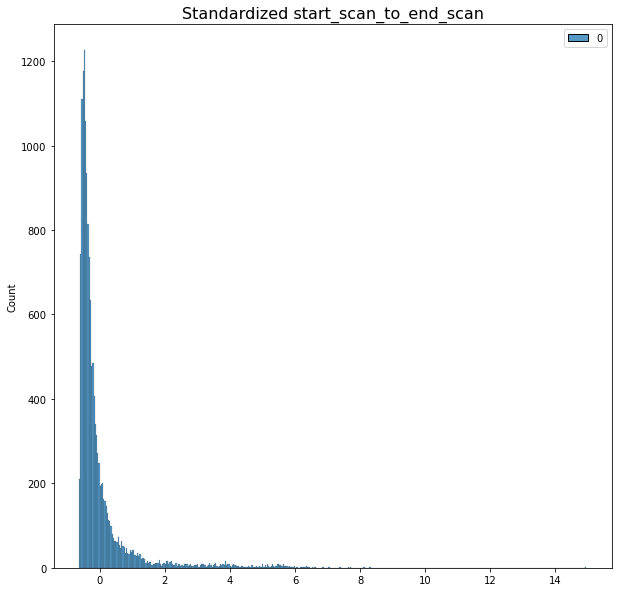

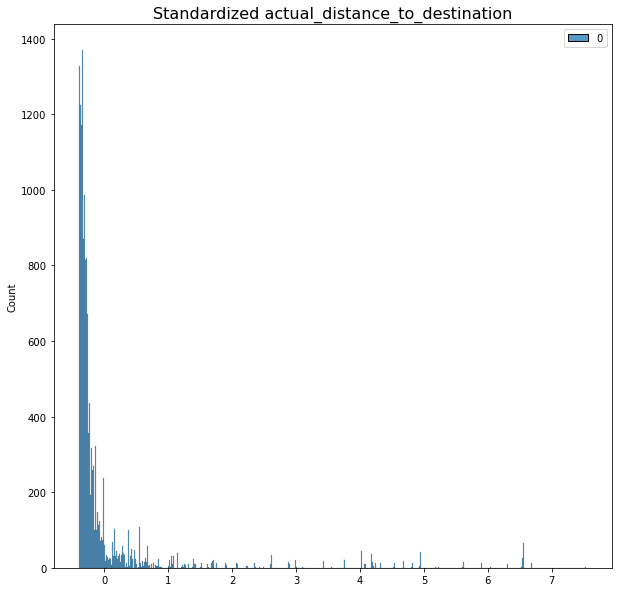

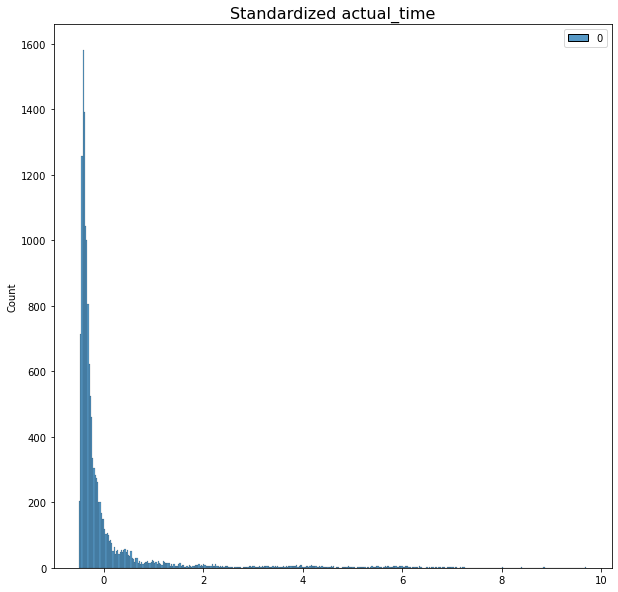

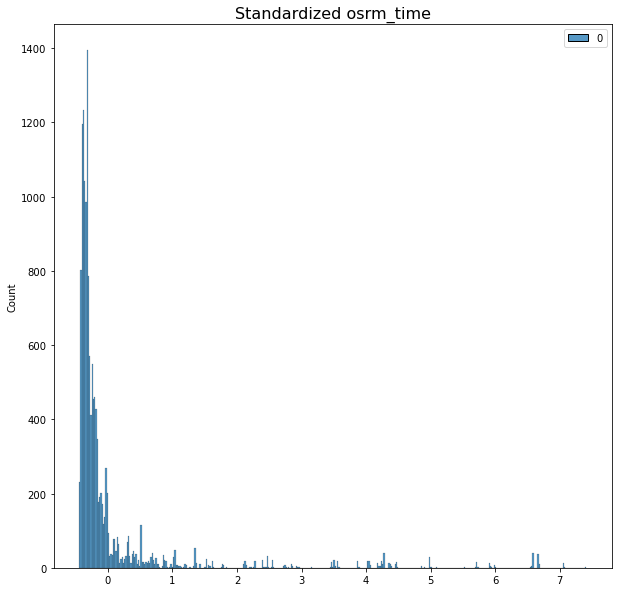

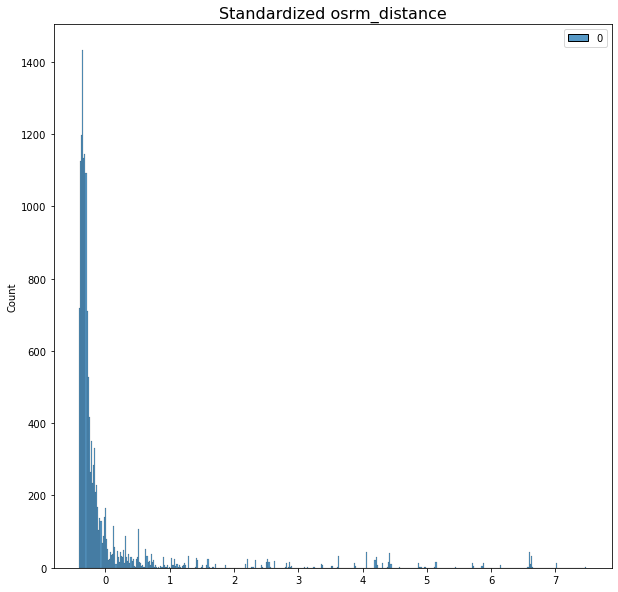

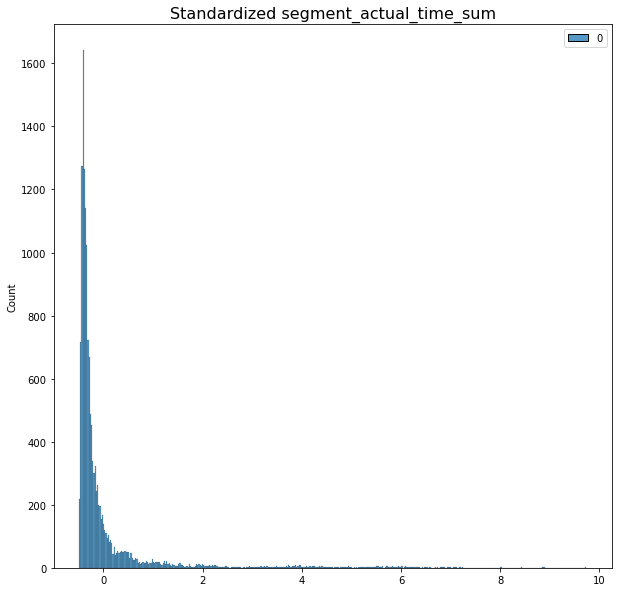

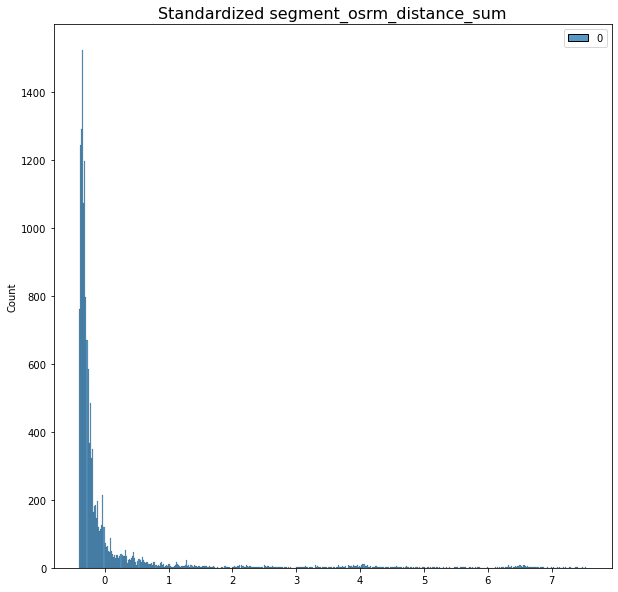

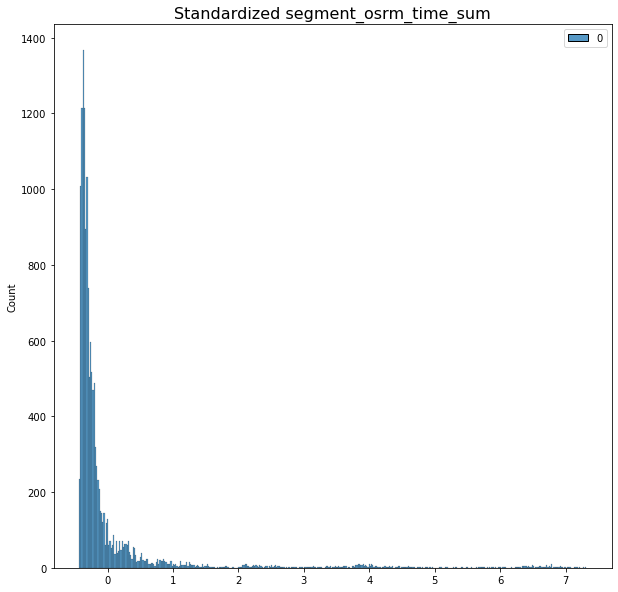

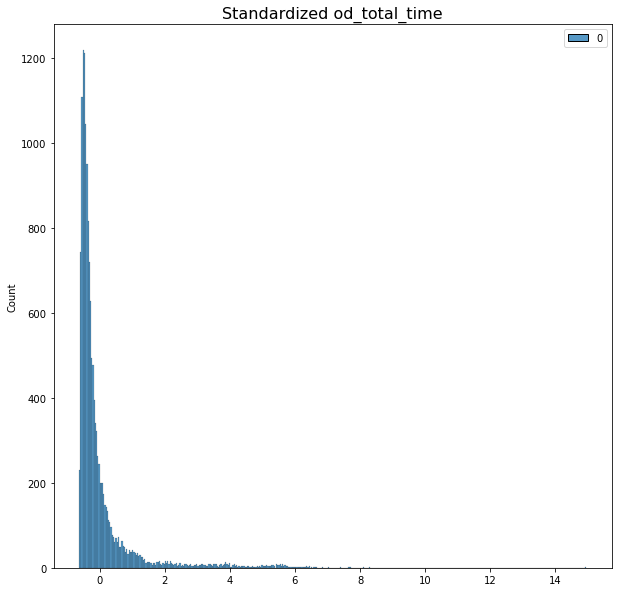

In [78]:
for col in trip_num_cols:
    plt.figure(figsize = (10, 10))
    scaler = StandardScaler()
    scaled = scaler.fit_transform(trip[col].to_numpy().reshape(-1, 1))
    sns.histplot(scaled)
    plt.title(f"Standardized {col}", fontsize=16)
    #plt.plot()
    plt.show()

# 5. Hypothesis Testing Check / Visual Analysis

For checking correlation between numeric data we choose correlation Spearman correlation and calculate correlation coefficient by calculatiing rank of each data and then find the corrcoef.

- Null hypothesis is any two numeric columns are independent of each other.
- Alternate hypothesis will be columns are dependent on each other.
- The correration coefficient gives the strength of relationship.
- The range of spearman corrcoef is [-1,1].
- The more +ve the coeff is the more +ve the strength will be.
- The more -ve the coeff is, the more -ve the strenght will be.
- If the corrcoeff is 0 then there is no correlation between two numeric columns.

# actual_time aggregated value and OSRM time aggregated value

In [82]:
corr_elements = [['actual_time','segment_osrm_time_sum'],['actual_time','segment_actual_time_sum'],
                ['osrm_distance','segment_osrm_distance_sum'],['osrm_time','segment_osrm_time_sum']]

for col in corr_elements:
    val = np.corrcoef(trip[col[0]].rank(), trip[col[1]].rank())[0,1]
    if val> 0 :
        print(f'There is +ve relation between {col[0]} and', col[1],"- corrcoef: ",np.round(val,2))
    if val == 0:
        print(f'There is no relation between {col[0]} and ', col[1],"- corrcoef: ",np.round(val,2))
    if val< 0:
        print(f'There is -ve relation between {col[0]} and ', col[1],"- corrcoef: ",np.round(val,2))

There is +ve relation between actual_time and segment_osrm_time_sum - corrcoef:  0.83
There is +ve relation between actual_time and segment_actual_time_sum - corrcoef:  1.0
There is +ve relation between osrm_distance and segment_osrm_distance_sum - corrcoef:  0.99
There is +ve relation between osrm_time and segment_osrm_time_sum - corrcoef:  0.98


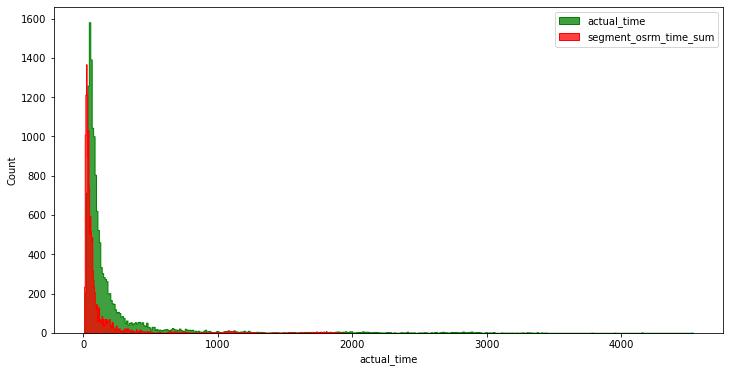

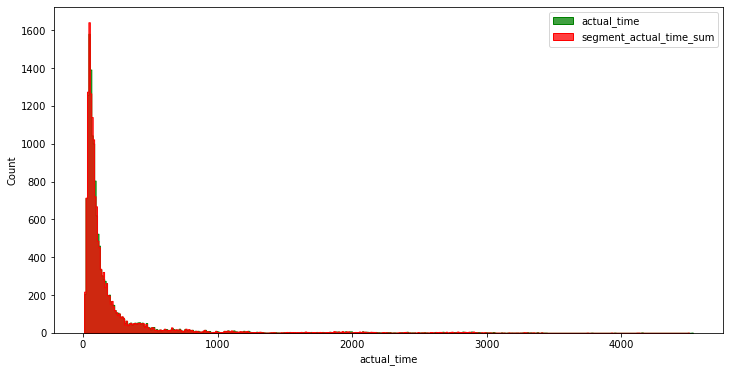

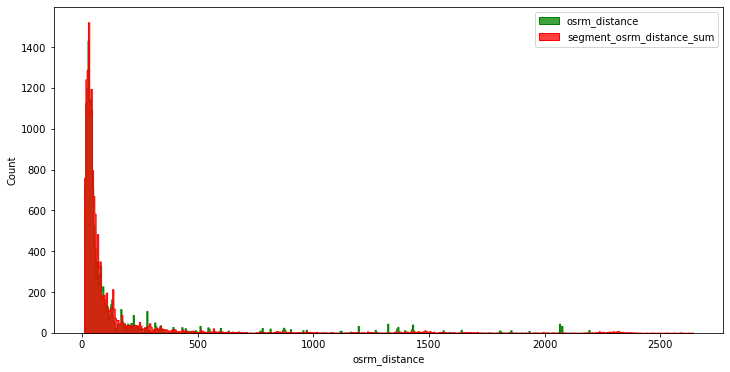

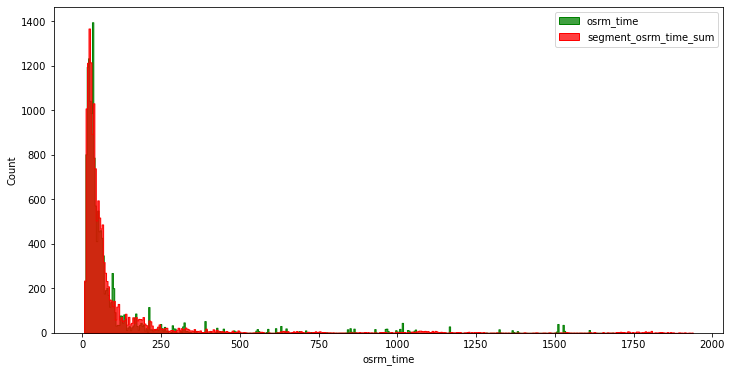

In [84]:
for col in corr_elements:
    plt.figure(figsize = (12, 6))
    sns.histplot(trip[col[0]], element = 'step', color = 'green')
    sns.histplot(trip[col[1]], element = 'step', color = 'red')
    plt.legend([col[0], col[1]])
    plt.plot()

In [ ]:
Insights:
    
    From the hypothesis testing and visual analysis we can observe that actual_time and segment_osrm_time_sum are less correlated than 
    others.
    actual_time and segment_actual_time_sum is 100% correlated.
    osrm_distance and segment_osrm_distance_sum and osrm_time and segment_osrm_time_sum are 98% correlated.
    This indicates ORSM navigation system has some glithces in time and distance calculation.

In [85]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14817 non-null  int64         
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  int64         
 4   trip_uuid                       14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14817 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14817 non-null  object        
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

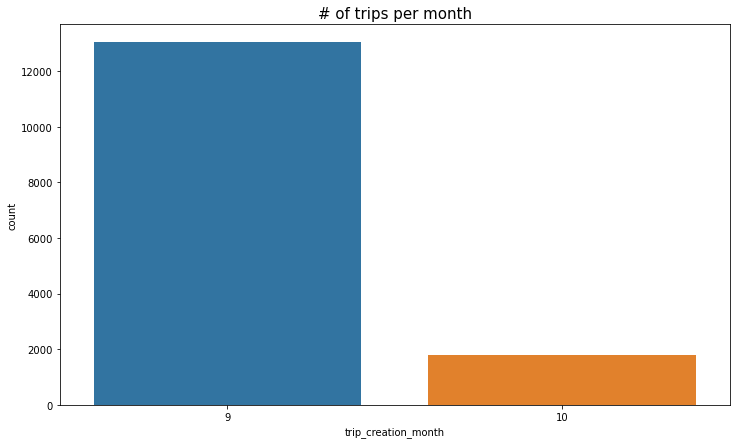

In [126]:
plt.figure(figsize=(12,7))
sns.countplot(x=trip.trip_creation_month)
plt.title("# of trips per month", fontsize = 15)
plt.show()

Insight: More trips are created in the month of september.

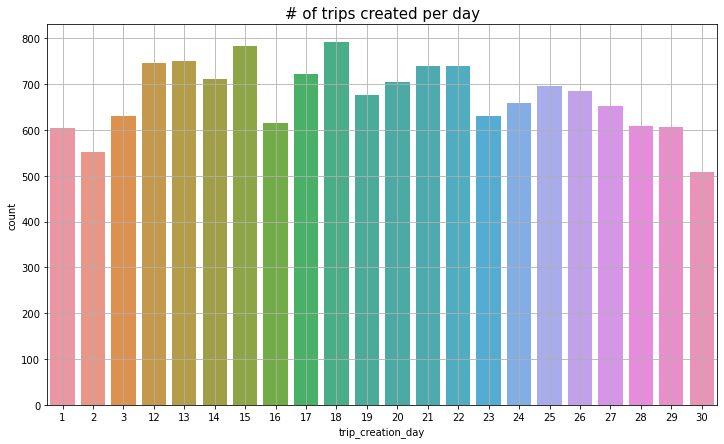

In [127]:
plt.figure(figsize=(12,7))
sns.countplot(x=trip.trip_creation_day)
plt.grid(True)
plt.title("# of trips created per day", fontsize= 15)
plt.show()

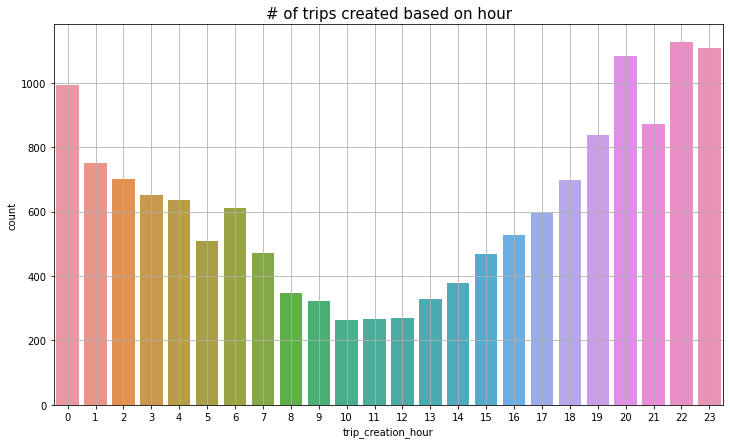

In [128]:
plt.figure(figsize=(12,7))
sns.countplot(x=trip.trip_creation_hour)
plt.grid(True)
plt.title("# of trips created based on hour", fontsize= 15)
plt.show()

Insights: More trips are created at night hours.

In [109]:
# States with highest no of trips created
df_source_state = trip.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'perc', ascending = False)
df_source_state.head()

,source_state,trip_uuid,perc
17,Maharashtra,2714,18.32
14,Karnataka,2143,14.46
10,Haryana,1838,12.40
24,Tamil Nadu,1039,7.01
25,Telangana,781,5.27


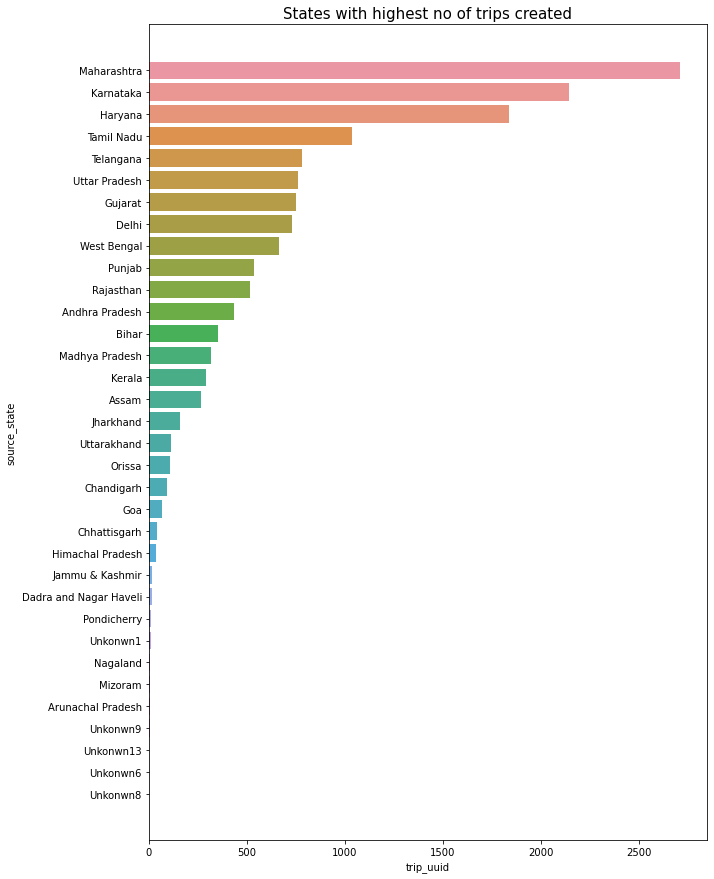

In [129]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state, 
            x = df_source_state['trip_uuid'], 
            y = df_source_state['source_state'])
plt.title("States with highest no of trips created", fontsize=15)
plt.plot()
plt.show()

Insights: 
    
    Maharashtra is the top state with highest no of trips booed from. secon and third would be Karnataka and  Haryana.
    Pondicherry, Dadra and Nagar Haveli are the least booking states.

In [114]:
# top 20 cities based on the number of trips created from different cities
df_source_city = trip.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'perc', ascending = False)[:20]
df_source_city

,source_city,trip_uuid,perc
242,Gurgaon,1165,7.86
446,Mumbai,1128,7.61
173,Delhi,883,5.96
80,Bengaluru,726,4.90
101,Bhiwandi,697,4.70
58,Bangalore,648,4.37
139,Chennai,568,3.83
269,Hyderabad,524,3.54
530,Pune,480,3.24
364,Kolkata,356,2.40


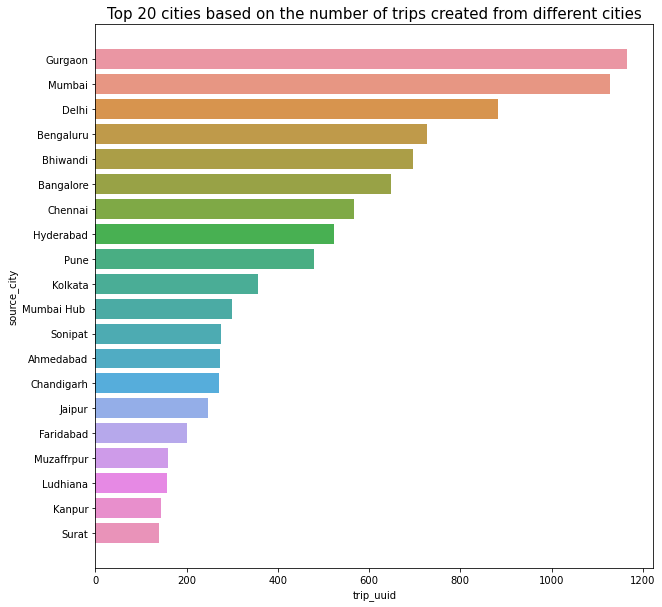

In [131]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_city, 
            x = df_source_city['trip_uuid'], 
            y = df_source_city['source_city'])
plt.title("Top 20 cities based on the number of trips created from different cities", fontsize=15)
plt.plot()
plt.show()

Insights:
    
    Gurgon is the top city with highest nuber of trips created followed by Mumbai and Delhi.

In [121]:
# Destinatoin States with highest no of trips created to
df_destn_state = trip.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destn_state['perc'] = np.round(df_destn_state['trip_uuid'] * 100/ df_destn_state['trip_uuid'].sum(), 2)
df_destn_state = df_destn_state.sort_values(by = 'perc', ascending = False)
df_source_state.head()

,source_state,trip_uuid,perc
17,Maharashtra,2714,18.32
14,Karnataka,2143,14.46
10,Haryana,1838,12.40
24,Tamil Nadu,1039,7.01
25,Telangana,781,5.27


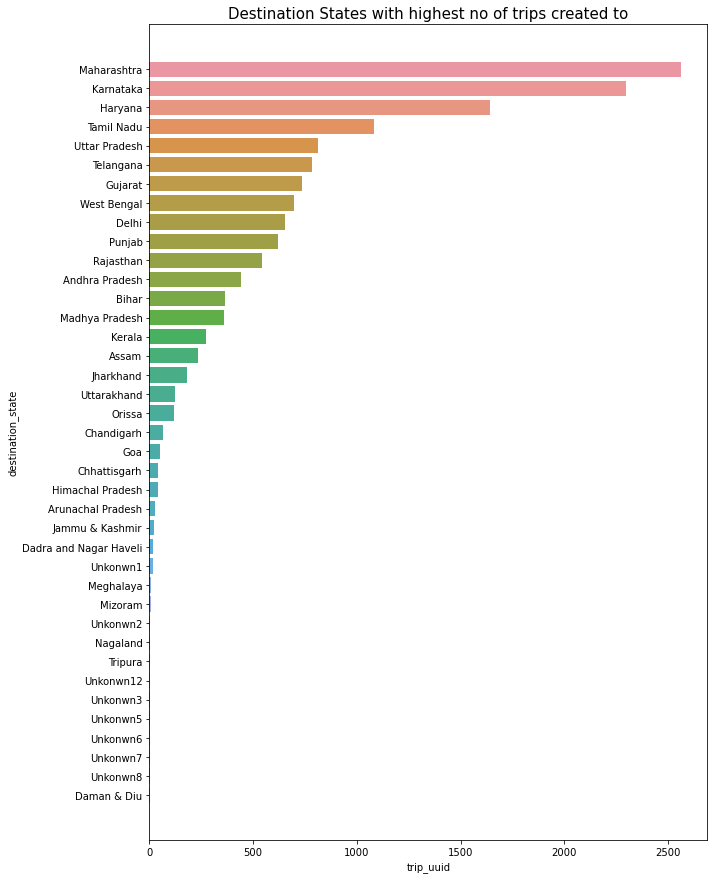

In [134]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_destn_state, 
            x = df_destn_state['trip_uuid'], 
            y = df_destn_state['destination_state'])
plt.title("Destination States with highest no of trips created to", fontsize = 15)
plt.plot()
plt.show()

In [ ]:
Insights:
    
    Top Destination states are Maharashtra, Karnataka and Haryana.

In [118]:

# top 20 cities based on the number of trips created from different cities
df_destn_city = trip.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destn_city['perc'] = np.round(df_destn_city['trip_uuid'] * 100/ df_destn_city['trip_uuid'].sum(), 2)
df_destn_city = df_destn_city.sort_values(by = 'perc', ascending = False)[:20]
df_destn_city

,destination_city,trip_uuid,perc
521,Mumbai,1312,8.85
97,Bengaluru,975,6.58
286,Gurgaon,936,6.32
203,Delhi,778,5.25
166,Chennai,595,4.02
73,Bangalore,551,3.72
312,Hyderabad,503,3.39
116,Bhiwandi,434,2.93
424,Kolkata,384,2.59
160,Chandigarh,338,2.28


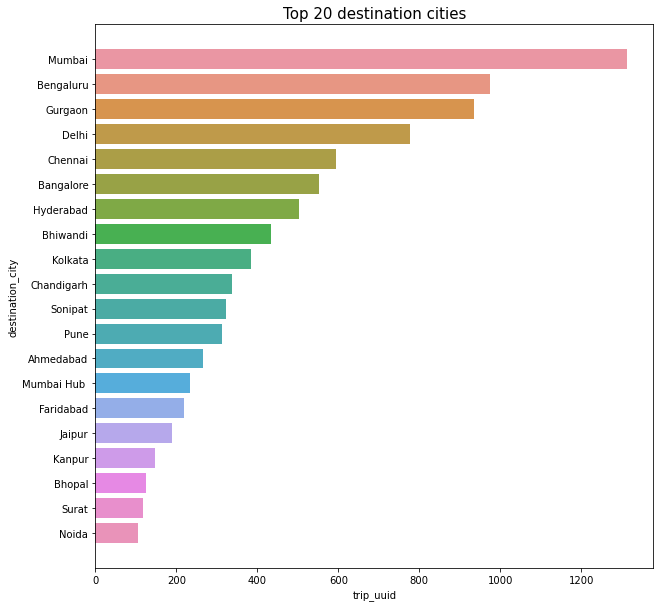

In [136]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destn_city, 
            x = df_destn_city['trip_uuid'], 
            y = df_destn_city['destination_city'])
plt.title("Top 20 destination cities",fontsize=15 )
plt.plot()
plt.show()

In [ ]:
Insights: 
    
    Mumbai, Gurgon and Delhi are top 3 destination cities.